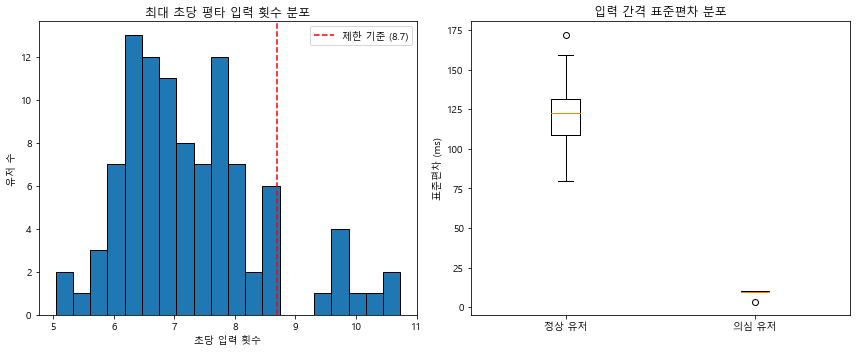


[의심 유저 상위 5명 샘플]
   user_id  max_attacks_per_sec  std_gap_ms
91    U092            10.729795    9.940064
92    U093            10.697676   10.399164
99    U100            10.195792    9.564107
90    U091            10.046730   10.354385
98    U099             9.822588    9.317477


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# --------------------------
# 1. 데이터 생성
# --------------------------
np.random.seed(123)
n_users = 100

# 정상 유저 90명 (속도 낮고 간격 변동 큼)
normal_max_hits = np.random.normal(7, 0.7, 90)           # 초당 7 ± 0.7회
normal_std_gaps = np.random.normal(120, 20, 90)          # 간격 표준편차 120 ± 20ms

# 매크로 유저 10명 (속도 높고 간격 거의 일정)
suspect_max_hits = np.random.normal(10, 0.5, 10)         # 초당 10 ± 0.5회
suspect_std_gaps = np.random.normal(10, 2, 10)           # 간격 표준편차 10 ± 2ms

# 전체 데이터 결합
user_ids = [f"U{i+1:03d}" for i in range(n_users)]
df = pd.DataFrame({
    "user_id": user_ids,
    "max_attacks_per_sec": np.concatenate([normal_max_hits, suspect_max_hits]),
    "std_gap_ms": np.concatenate([normal_std_gaps, suspect_std_gaps])
})

# --------------------------
# 2. 의심 유저 추출
# --------------------------
threshold_hit = 8.7  # 초당 입력 제한 기준
suspect_df = df[df["max_attacks_per_sec"] > threshold_hit].sort_values(
    by="max_attacks_per_sec", ascending=False).head(5)

# --------------------------
# 3. 시각화
# --------------------------
plt.figure(figsize=(12, 5))

# 3-1. 히스토그램: 초당 입력 횟수
plt.subplot(1, 2, 1)
plt.hist(df["max_attacks_per_sec"], bins=20, edgecolor='black')
plt.axvline(x=threshold_hit, color='red', linestyle='--', label='제한 기준 (8.7)')
plt.title("최대 초당 평타 입력 횟수 분포")
plt.xlabel("초당 입력 횟수")
plt.ylabel("유저 수")
plt.legend()

# 3-2. 박스플롯: 입력 간격 표준편차
plt.subplot(1, 2, 2)
plt.boxplot([
    df[df["max_attacks_per_sec"] <= threshold_hit]["std_gap_ms"],
    df[df["max_attacks_per_sec"] > threshold_hit]["std_gap_ms"]
], labels=["정상 유저", "의심 유저"])
plt.title("입력 간격 표준편차 분포")
plt.ylabel("표준편차 (ms)")

plt.tight_layout()
plt.show()

# --------------------------
# 4. 상위 의심 유저 출력
# --------------------------
print("\n[의심 유저 상위 5명 샘플]")
print(suspect_df[["user_id", "max_attacks_per_sec", "std_gap_ms"]])


ModuleNotFoundError: No module named 'caas_jupyter_tools'

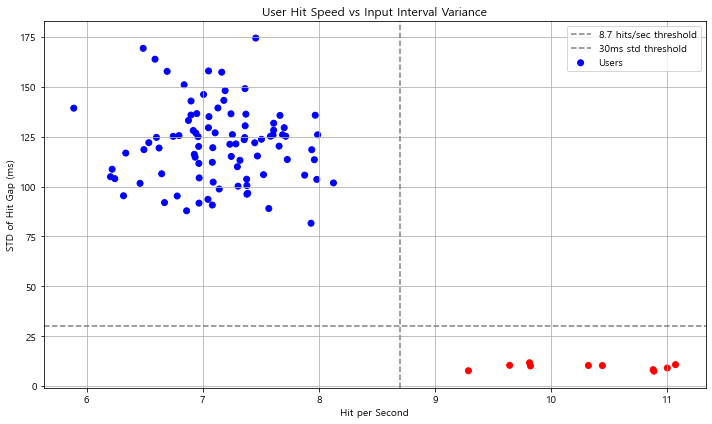

In [2]:
# 가상 데이터 생성
np.random.seed(42)
n_users = 100

# 정상 유저: 90명 (평타 속도 평균 6~8회/sec, 표준편차 80~150ms)
normal_users = pd.DataFrame({
    'user_id': [f'user_{i}' for i in range(90)],
    'hit_per_sec': np.random.normal(loc=7.2, scale=0.5, size=90),
    'std_gap_ms': np.random.normal(loc=120, scale=20, size=90)
})

# 매크로 유저: 10명 (평타 속도 평균 9~12회/sec, 표준편차 5~15ms)
macro_users = pd.DataFrame({
    'user_id': [f'user_{i}' for i in range(90, 100)],
    'hit_per_sec': np.random.normal(loc=10.5, scale=0.8, size=10),
    'std_gap_ms': np.random.normal(loc=10, scale=2, size=10)
})

# 데이터 통합
df = pd.concat([normal_users, macro_users], ignore_index=True)

# 의심 유저 기준: hit_per_sec > 8.7 and std_gap_ms < 30
df['suspicious'] = (df['hit_per_sec'] > 8.7) & (df['std_gap_ms'] < 30)

# 상위 의심 유저 5명
top_suspicious = df[df['suspicious']].sort_values(by='hit_per_sec', ascending=False).head(5)

# 시각화: 히트 속도 vs 표준편차
plt.figure(figsize=(10, 6))
plt.scatter(df['hit_per_sec'], df['std_gap_ms'], c=df['suspicious'].map({True: 'red', False: 'blue'}), label='Users')
plt.axvline(8.7, color='gray', linestyle='--', label='8.7 hits/sec threshold')
plt.axhline(30, color='gray', linestyle='--', label='30ms std threshold')
plt.xlabel('Hit per Second')
plt.ylabel('STD of Hit Gap (ms)')
plt.title('User Hit Speed vs Input Interval Variance')
plt.legend()
plt.grid(True)
plt.tight_layout()

import caas_jupyter_tools as tools; tools.display_dataframe_to_user(name="Suspicious Users", dataframe=top_suspicious)

plt.show()


        mean_gap_ms  std_gap_ms  stability_coeff  kurtosis
Normal   141.626386   29.960118         0.211543  0.030134
Macro    110.154688    4.931496         0.044769  0.118748


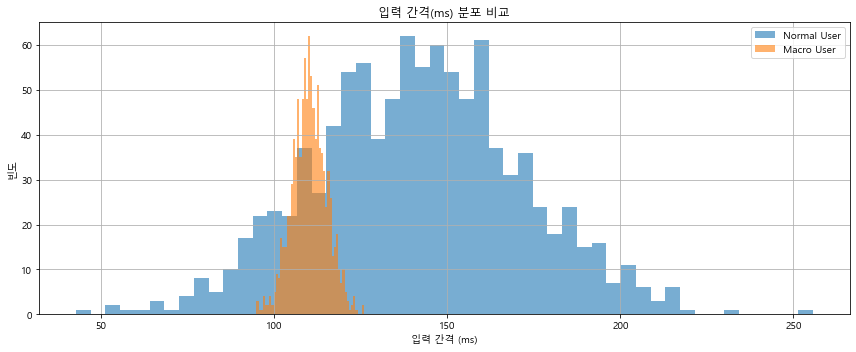

In [3]:
from scipy.stats import kurtosis

# 가상 입력 간격(ms) 데이터 생성 함수
def simulate_hit_intervals(user_type, n_intervals=1000):
    if user_type == "normal":
        return np.random.normal(loc=140, scale=30, size=n_intervals)
    elif user_type == "macro":
        return np.random.normal(loc=110, scale=5, size=n_intervals)

# 두 명의 유저 입력 간격 데이터 생성
normal_user_gaps = simulate_hit_intervals("normal")
macro_user_gaps = simulate_hit_intervals("macro")

# 지표 계산 함수
def compute_metrics(gap_array):
    mean_gap = np.mean(gap_array)
    std_gap = np.std(gap_array)
    stability = std_gap / mean_gap
    kurt = kurtosis(gap_array)
    return {
        "mean_gap_ms": mean_gap,
        "std_gap_ms": std_gap,
        "stability_coeff": stability,
        "kurtosis": kurt
    }

# 지표 계산
normal_metrics = compute_metrics(normal_user_gaps)
macro_metrics = compute_metrics(macro_user_gaps)

# 데이터프레임으로 비교
comparison_df = pd.DataFrame([normal_metrics, macro_metrics], index=["Normal", "Macro"])
print(comparison_df)

# 시각화: 입력 간격 분포
plt.figure(figsize=(12, 5))
plt.hist(normal_user_gaps, bins=50, alpha=0.6, label='Normal User')
plt.hist(macro_user_gaps, bins=50, alpha=0.6, label='Macro User')
plt.title('입력 간격(ms) 분포 비교')
plt.xlabel('입력 간격 (ms)')
plt.ylabel('빈도')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


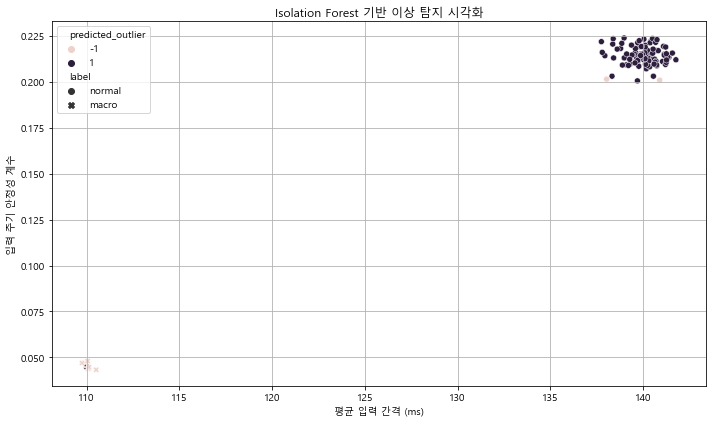

   mean_gap_ms  std_gap_ms  stability_coeff  kurtosis   label  \
0   139.733918   29.728996         0.212754  0.071909  normal   
1   139.795227   30.663782         0.219348 -0.098231  normal   
2   138.979948   29.621292         0.213134  0.105631  normal   
3   138.785113   30.299706         0.218321 -0.026730  normal   
4   138.969667   31.131255         0.224015 -0.153613  normal   

   predicted_outlier  
0                  1  
1                  1  
2                  1  
3                  1  
4                  1  


In [4]:
import seaborn as sns
from scipy.stats import kurtosis
from sklearn.ensemble import IsolationForest

# 가상 입력 간격(ms) 데이터 생성 함수
def simulate_hit_intervals(user_type, n_intervals=1000):
    if user_type == "normal":
        return np.random.normal(loc=140, scale=30, size=n_intervals)
    elif user_type == "macro":
        return np.random.normal(loc=110, scale=5, size=n_intervals)

# 지표 계산 함수
def compute_metrics(gap_array):
    mean_gap = np.mean(gap_array)
    std_gap = np.std(gap_array)
    stability = std_gap / mean_gap
    kurt = kurtosis(gap_array)
    return {
        "mean_gap_ms": mean_gap,
        "std_gap_ms": std_gap,
        "stability_coeff": stability,
        "kurtosis": kurt
    }

# 유저 샘플 생성 함수
def generate_user_samples(n_normal=100, n_macro=10):
    users = []
    for _ in range(n_normal):
        metrics = compute_metrics(simulate_hit_intervals("normal"))
        metrics["label"] = "normal"
        users.append(metrics)
    for _ in range(n_macro):
        metrics = compute_metrics(simulate_hit_intervals("macro"))
        metrics["label"] = "macro"
        users.append(metrics)
    return pd.DataFrame(users)

# 1. 데이터 생성
user_df = generate_user_samples()

# 2. 모델 학습
X = user_df[["mean_gap_ms", "std_gap_ms", "stability_coeff", "kurtosis"]]
model = IsolationForest(contamination=0.1, random_state=42)
model.fit(X)

# 3. 예측 및 이상치 스코어
user_df["anomaly_score"] = model.decision_function(X)
user_df["predicted_outlier"] = model.predict(X)  # -1: 이상치, 1: 정상

# 4. 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(data=user_df, x="mean_gap_ms", y="stability_coeff", hue="predicted_outlier", style="label")
plt.title("Isolation Forest 기반 이상 탐지 시각화")
plt.xlabel("평균 입력 간격 (ms)")
plt.ylabel("입력 주기 안정성 계수")
plt.grid(True)
plt.tight_layout()
plt.show()

# 5. 결과 미리보기
print(user_df[["mean_gap_ms", "std_gap_ms", "stability_coeff", "kurtosis", "label", "predicted_outlier"]].head())


In [5]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# label → 정답값 (macro = 1, normal = 0)
user_df["true_label"] = user_df["label"].apply(lambda x: 1 if x == "macro" else 0)

# Isolation Forest 결과 → 예측값 (-1 = 이상치 → 1, 1 = 정상 → 0)
user_df["predicted_label"] = user_df["predicted_outlier"].apply(lambda x: 1 if x == -1 else 0)

# 지표 계산
precision = precision_score(user_df["true_label"], user_df["predicted_label"])
recall = recall_score(user_df["true_label"], user_df["predicted_label"])
f1 = f1_score(user_df["true_label"], user_df["predicted_label"])
accuracy = accuracy_score(user_df["true_label"], user_df["predicted_label"])

# 출력
print(f"Precision : {precision:.3f}")
print(f"Recall    : {recall:.3f}")
print(f"F1 Score  : {f1:.3f}")
print(f"Accuracy  : {accuracy:.3f}")


Precision : 0.818
Recall    : 0.900
F1 Score  : 0.857
Accuracy  : 0.973


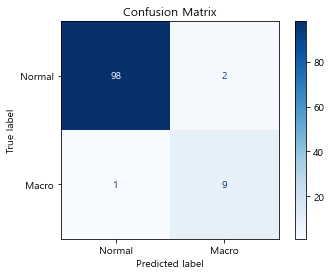

In [6]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 혼동 행렬 계산
cm = confusion_matrix(user_df["true_label"], user_df["predicted_label"])

# 시각화
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "Macro"])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()
